In [67]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [31]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


In [32]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [33]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
   

In [54]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []
print(f"Epochs {num_epochs}, num_val_samples {num_val_samples}")
for i in range(k):
    print(f'processing fold {i}')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)


Epochs 100, num_val_samples 101
processing fold 0
101/101 [==============================] - 0s 486us/sample - loss: 7.7212 - mae: 1.9698
processing fold 1
101/101 [==============================] - 0s 619us/sample - loss: 8.4064 - mae: 2.1556
processing fold 2
101/101 [==============================] - 0s 662us/sample - loss: 14.6514 - mae: 2.5080
processing fold 3
101/101 [==============================] - 0s 628us/sample - loss: 11.9356 - mae: 2.3212


In [55]:
all_scores

[1.9697657, 2.1556325, 2.508032, 2.3212469]

In [56]:
np.mean(all_scores)

2.2386694

In [58]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'processing fold {i}')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0,
                       validation_data=(val_data, val_targets))
    print(history.history.keys())
    all_mae_histories.append(history.history['val_mae'])


processing fold 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [68]:
average_mae_history = np.mean(np.array(all_mae_histories), axis=0)

No handles with labels found to put in legend.


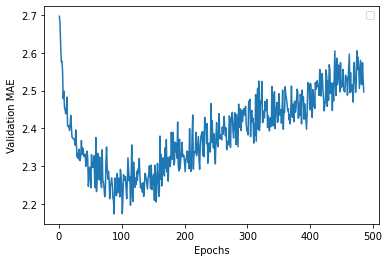

In [73]:
plt.clf()
plt.plot(range(1, len(average_mae_history[15:]) +1), average_mae_history[15:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [80]:
np.argmin(avereage_mae_history)

102

In [81]:
avereage_mae_history[102]

2.1735811

In [82]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

In [83]:
model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 409us/sample - loss: 19.2403 - mae: 2.7458


[19.2402992996515, 2.74584]